In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

#input_dir = "/content/drive/MyDrive/input/"
output_dir = "/content/drive/MyDrive/output/"

#np.random.seed(314) # 基礎課題5-2でのseedの設定例

Mounted at /content/drive


## 多項式回帰
教科書3.5節の再現を目指します。


In [2]:
# 入力ベクトルはは (1, x, x^2, x^3)^T の多次元多項式を仮定する
# そのため、{x^(m-1)}ベクトル作成関数を定義 (n_lineの次元次元 x M)
def x_vector(x_n, M):
    x_nm = np.zeros(shape=(len(x_n), M))
    
    # 列にm乗を計算
    for m in range(M):
        x_nm[:, m] = np.power(x_n, m) # x^0 =1 であることを利用し、x^{m-1}_n を計算する
    return x_nm

### 正解の作成

In [3]:
print(x_vector(np.arange(1, 5), 4)) # 使い方のテストで、で、1から4の値をを4次元ベクトルにする

[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]


In [4]:
M_truth = 4 # 真の次元数を指定

# -1 からから 1 の範囲でランダムに真のパラメータを生成
w_truth_m = np.random.choice(np.arange(-1.0, 1.0, step=0.1), size=M_truth, replace=True)

# 確認
print(w_truth_m)

[ 0.7 -1.   0.1  0.4]


In [5]:
# 作図用のx軸の値を作成
x_line = np.arange(-3.0, 3.0, step=0.01)
print (x_line.shape)

# 作図用のx_lineをM次元に拡張し、x_truth_arrとする
x_truth_arr = x_vector(x_line, M_truth)
print (x_truth_arr.shape)
print(x_truth_arr[:5]) # 先頭5行を確認

(600,)
(600, 4)
[[  1.        -3.         9.       -27.      ]
 [  1.        -2.99       8.9401   -26.730899]
 [  1.        -2.98       8.8804   -26.463592]
 [  1.        -2.97       8.8209   -26.198073]
 [  1.        -2.96       8.7616   -25.934336]]


In [6]:
# 真のモデルの出力を計算 式(3.141) のノイズなし
y_line = np.dot(w_truth_m, x_truth_arr.T)

# 確認
print (y_line.shape)
print(np.round(y_line[:5], 2))

(600,)
[-6.2  -6.11 -6.02 -5.93 -5.84]


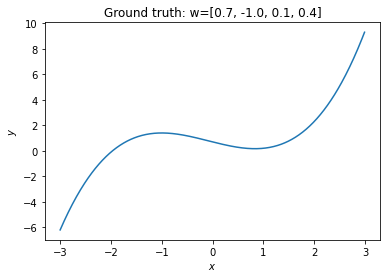

In [7]:
# 真のモデルを作図
plt.figure()
plt.plot(x_line, y_line) # 真のモデル (正解データ)
plt.title('Ground truth: w=[' + ', '.join([str(w) for w in np.round(w_truth_m, 2).flatten()]) + ']')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [8]:
# ノイズ成分の標準偏差を指定
sigma = 1.5

# ノイズ成分の精度を計算　分散の逆数を精度と呼ぶ
lmd = 1.0 / sigma**2

# 確認
print(lmd)

0.4444444444444444


### ノイズを含む学習データ生成

In [9]:
# ノイズ成分を次元のガウス分布から1つ生成
print(np.random.normal(loc=0.0, scale=np.sqrt(1 / lmd), size=1))

[1.5012359]


In [10]:
# (観測)データ数を指定
N = 100

# 入力値を一様分布から生成
x_n = np.random.choice(np.arange(min(x_line), max(x_line), step=0.01), size=N, replace=True)

# 入力値をM次元に拡張
x_truth_nm = x_vector(x_n, M_truth)

In [11]:
# ノイズ成分を1次元のガウス分布から生成
epsilon_n = np.random.normal(loc=0.0, scale=np.sqrt(1 / lmd), size=N)

# 出力値を計算:式(3.141)に従い従い出力値 Y を計算して y_n とする
y_n = np.dot(w_truth_m.reshape((1, M_truth)), x_truth_nm.T).flatten() + epsilon_n

# 確認
print(np.round(y_n[:5], 2))

[ 6.53 -0.52 -0.42  5.9  -2.93]


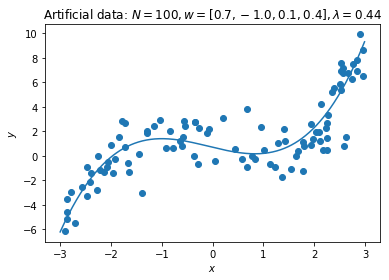

In [12]:
# 観測データの散布図 教科書 図3.7を作成
fig = plt.figure()
plt.scatter(x_n, y_n) # ノイズを加えた観測データ
plt.plot(x_line, y_line) # 真のモデル
plt.title('Artificial data: $N=' + str(N) + ', w=[' + ', '.join([str(w) for w in np.round(w_truth_m, 2).flatten()]) + ']' + ', \lambda=' + str(np.round(lmd, 2)) + '$') #w の要素数が次元数数Mにあたることに注意
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [13]:
# 基礎課題6-3に用いるため、主要なパラメータや変数をJSONファイルとして保存する。
# 参考 https://codechacha.com/ja/python-read-write-json-file/
# 保存する変数の型を確認
print (type(M_truth), type(N), type(w_truth_m), type(sigma), type(lmd), type(x_line), type(y_line), type(x_n), type(y_n))

# 辞書型に保存する情報を集める
json_data = {'M_truth': M_truth,
             'N': N,
             'w_truth_m': list(w_truth_m), # JSON で保存する場合にに ndarray 型はうけつけてくれないので、ndarray型の変数はlist型に変換しておく。
             'sigma': sigma, 
             'lmd': lmd,
             'x_line': list(x_line), 
             'y_line': list(y_line),
             'x_n': list(x_n),
             'y_n': list(y_n)
             }
print (json_data)

# 辞書型の変数の内容を JSON 形式で保存する。いつものように pd.DataFrame でCSV保存でもできないことはないが、パラメータをどう管理するのかが面倒なのでなので辞書型の変数の内容ををJSON形式で保存している。
import json
with open(output_dir + 'note5-1_output.json', 'w') as json_file:
  json.dump(json_data, json_file, ensure_ascii=False, indent=4) # インデントを4として保存


<class 'int'> <class 'int'> <class 'numpy.ndarray'> <class 'float'> <class 'float'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
{'M_truth': 4, 'N': 100, 'w_truth_m': [0.6999999999999997, -1.0, 0.09999999999999964, 0.3999999999999997], 'sigma': 1.5, 'lmd': 0.4444444444444444, 'x_line': [-3.0, -2.99, -2.9800000000000004, -2.9700000000000006, -2.960000000000001, -2.950000000000001, -2.9400000000000013, -2.9300000000000015, -2.9200000000000017, -2.910000000000002, -2.900000000000002, -2.8900000000000023, -2.8800000000000026, -2.8700000000000028, -2.860000000000003, -2.850000000000003, -2.8400000000000034, -2.8300000000000036, -2.820000000000004, -2.810000000000004, -2.8000000000000043, -2.7900000000000045, -2.7800000000000047, -2.770000000000005, -2.760000000000005, -2.7500000000000053, -2.7400000000000055, -2.7300000000000058, -2.720000000000006, -2.710000000000006, -2.7000000000000064, -2.6900000000000066, -2.680000000000007, -2.6700000

### 初期状態の確認

[[10.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.]
 [ 0.  0.  0. 10.  0.]
 [ 0.  0.  0.  0. 10.]]
[[0.01 0.   0.   0.   0.  ]
 [0.   0.01 0.   0.   0.  ]
 [0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.01 0.  ]
 [0.   0.   0.   0.   0.01]]


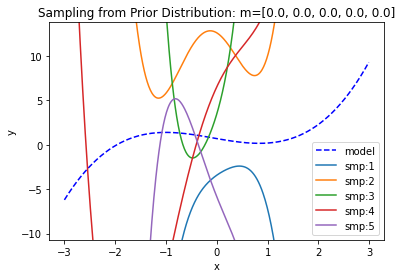

In [14]:
# 事前分布の次元数を指定
M = 5

# 事前分布の平均を指定
m_m = np.zeros(M)

# 事前分布の精度行列を指定
sigma_mm = np.identity(M) * 10 # 標準偏差と相関係数の行列を単位行列を作成する関数関数 np.identity で作成
lambda_mm = np.linalg.inv(sigma_mm**2) # sigma_mm から分散共分散行列の逆行列である精度行列行列 Λ = Σ^{-1} を linalg.inv を使って計算

# 確認
print(sigma_mm)
print(lambda_mm)

# 入力値をM次元に拡張
x_nm = x_vector(x_n, M)

# 作図用のxをM次元に拡張
x_arr = x_vector(x_line, M)

# サンプリング数を指定
smp_size = 5

# 事前分布からサンプリングしたwを用いたモデルを比較
prior_list = []
for i in range(smp_size):
    # 事前分布からのサンプリングでは仮定したM次元ガウス分布からパラメータを生成, 平均平均 m_m、共分散行列行列 linalg.inv(lambda_mm)、データ数=1　を指定している。
    prior_w_m = np.random.multivariate_normal(mean=m_m, cov=np.linalg.inv(lambda_mm), size=1)
     
    # 出力値を計算:式(3.141)
    tmp_y_line = np.dot(prior_w_m.reshape((1, M)), x_arr.T).flatten()
    
    # 結果をappend でリストの最後尾に格納
    prior_list.append(list(tmp_y_line))

# 教科書 図3.6の再現：事前分布からサンプリングしたパラメータによるモデルを作図. 単純なサンプリングではごちゃごちゃ。
plt.figure()
plt.plot(x_line, y_line, color='blue', linestyle='dashed', label='model') # 真のモデル
for i in range(smp_size):
    plt.plot(x_line, prior_list[i], label='smp:' + str(i+1)) # サンプリングしたwを用いたモデル
plt.title('Sampling from Prior Distribution: m=[' + ', '.join([str(m) for m in m_m]) + ']')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((min(y_line) - 3 * sigma, max(y_line) + 3 * sigma)) # y軸の表示範囲
plt.legend()
plt.show()

## 事後分布の計算

$ \hat{\bf \Lambda} = \lambda \sum^N_{n=1} {\bf x}_n {\bf x}^T_n + {\bf \Lambda} $

$ \hat{\bf m} = \hat{\bf \Lambda}^{^1} ( \lambda \sum^N_{n=1} y_n {\bf x}^T_n + {\bf \Lambda m} )$ 

In [15]:
# 事後分布のパラメータを計算:式(3.148). 観測データデータ y_n とと x_nm を用いて用いて w の事後分布のパラメータを計算
lambda_hat_mm = lmd * np.dot(x_nm.T, x_nm) + lambda_mm
term_m_m = lmd * np.dot(y_n.reshape((1, N)), x_nm).T 
term_m_m += np.dot(lambda_mm, m_m.reshape((M, 1)))
m_hat_m = np.dot(np.linalg.inv(lambda_hat_mm), term_m_m).flatten()

In [16]:
# 確認
print(np.round(lambda_hat_mm, 2))
print(np.round(m_hat_m, 2))

[[4.445000e+01 1.166000e+01 1.643500e+02 7.726000e+01 9.304800e+02]
 [1.166000e+01 1.643600e+02 7.726000e+01 9.304800e+02 5.104100e+02]
 [1.643500e+02 7.726000e+01 9.304900e+02 5.104100e+02 6.016850e+03]
 [7.726000e+01 9.304800e+02 5.104100e+02 6.016860e+03 3.524550e+03]
 [9.304800e+02 5.104100e+02 6.016850e+03 3.524550e+03 4.185249e+04]]
[ 1.21 -1.1  -0.31  0.4   0.04]


In [17]:
# 事後分布からサンプリングしたwを用いてモデルを比較
posterior_list = []
for i in range(smp_size):
    # パラメータを生成
    posterior_w_m = np.random.multivariate_normal(mean=m_hat_m, cov=np.linalg.inv(lambda_hat_mm), size=1)
    
    # 出力値を計算:式(3.141)
    tmp_y_line = np.dot(posterior_w_m.reshape((1, M)), x_arr.T).flatten()
    
    # 結果を格納
    posterior_list.append(list(tmp_y_line))

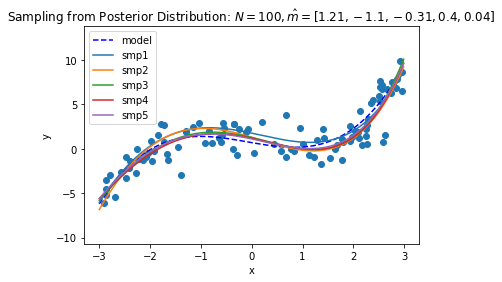

In [18]:
# 事後分布からサンプリングしたパラメータによるモデルを作図. 真のモデルに近くなっていることが確認できる
plt.figure()
plt.plot(x_line, y_line, color='blue', linestyle='dashed', label='model') # 真のモデル
plt.scatter(x_n, y_n) # 乱数を加えたデータ
for i in range(smp_size):
    plt.plot(x_line, posterior_list[i], label='smp' + str(i+1)) # サンプリングしたwを用いたモデル
plt.title('Sampling from Posterior Distribution: $N=' + str(N) + ', \hat{m}=[' + ', '.join([str(m) for m in np.round(m_hat_m, 2)]) + ']$')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((min(y_line) - 3 * sigma, max(y_line) + 3 * sigma)) # y軸の表示範囲
plt.legend()
plt.show()

In [19]:
# 真のパラメータを確認
print(w_truth_m)

# パラメータの期待値を確認
print(np.round(m_hat_m, 2)) # パラメータの期待値は多次元正規分布の期待値 式(2.76) より m_hat_m). 真のパラメータにないない5次元目はは0に近い値になっていることに注意

[ 0.7 -1.   0.1  0.4]
[ 1.21 -1.1  -0.31  0.4   0.04]


## 予測分布の計算

In [20]:
# 観測データ y と X の新規入力値 x_star から 未観測値 y_star の予測分布を求める
# 予測分布のパラメータを計算:式(3.155')
mu_star_hat_line = np.dot(m_hat_m.reshape((1, M)), x_arr.T).flatten()
sigma2_star_hat_line = np.diag(x_arr.dot(np.linalg.inv(lambda_hat_mm)).dot(x_arr.T)) + 1 / lmd

In [21]:
# 真のパラメータ確認
print(np.round(mu_star_hat_line[:5], 2))
print(np.round(sigma2_star_hat_line[:5], 2))

[-5.56 -5.49 -5.42 -5.36 -5.29]
[2.83 2.81 2.79 2.77 2.75]


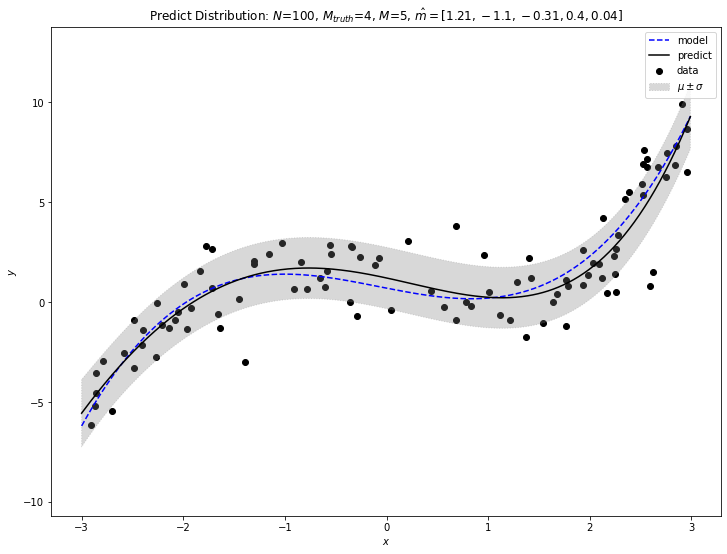

In [22]:
# 予測分布を作図
plt.figure(figsize=(12,9)) # ちょっと図を大きくして確認
#plt.figure() 
plt.plot(x_line, y_line, linestyle='dashed', color='blue', label='model') # 真のモデル
plt.scatter(x_n, y_n, color='black', label="data") # 観測データ
plt.plot(x_line, mu_star_hat_line, color='black', label='predict') # 予測分布の期待値
# 標準偏差の範囲のの plt.fill_between で表示
plt.fill_between(x=x_line, y1=mu_star_hat_line - np.sqrt(sigma2_star_hat_line), y2=mu_star_hat_line + np.sqrt(sigma2_star_hat_line), color='gray', alpha=0.3, linestyle='dotted', label='$\mu \pm \sigma$') # 予測分布の標準偏差
plt.title('Predict Distribution: $N$=' + str(N) + ', $M_{truth}$=' + str(M_truth) + ', $M$=' + str(M) + ', $\hat{m}=[' + ', '.join([str(m) for m in np.round(m_hat_m, 2)]) + ']$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim((min(y_line) - 3 * sigma, max(y_line) + 3 * sigma)) # y軸の表示範囲
plt.legend()
plt.show()